In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# 0. Together

Expectation Maximization with Gaussian Mixture Models (we'll call it EM for short here) is a clustering algorithm that's similar to k-means except it doesn't assume spherical variance within clusters. That means clusters can be ellipses rather than just sphereical. For example the graph on the left shows roughly spherical clusters, whereas the graph on the right shows non-spherical clusters.

<img src="https://drive.google.com/uc?export=view&id=1BslkqKXSuxYNcpAhFLlsVsBSdWUCWY3W"/>

The process for fitting EM is similar to k-means except for two main differences:

1. Instead of estimating ONLY cluster means/centers, we also estimate the variance for each predictor.
2. Instead of hard assignment (where each data point belongs to only 1 cluster), GMMs use soft assignment (where each data point has a probability of being in EACH cluster). 
    - because there is no hard assignment, the cluster centers/means and variances are calculated using EVERY data point weighted by the probability that the data point belongs to that cluster. Data points that are unlikely to belong to a cluster barely affect the center/mean and variance of that cluster, whereas data points that are very likely to belong to a cluster have a larger influence on the center/mean and variance of that cluster.

This means that when clusters are NOT spherical, EM will be able to accomodate that, while k-means will not.


# 1. Comparing K-Means and EM

Let's compare the performance of K-Means and EM on different data sets (data is ALREADY z scored). For each dataset listed below, perform K-Means AND EM. For both algorithms, choose the optimal number of clusters by maximizing the silhouette scores. Then answer the following questions:

1. is the number of clusters chosen the same for KM and EM?
2. how does cluster membership compare between the clusters found by KM and EM?
3. make scatterplots of the clusters from KM and from EM
4. did you notice any interesting or counterintuitive results?
5. did one method have a lower silhouette score than the other?
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


## 1.1 Oblong Clusters

0.5319247935472973


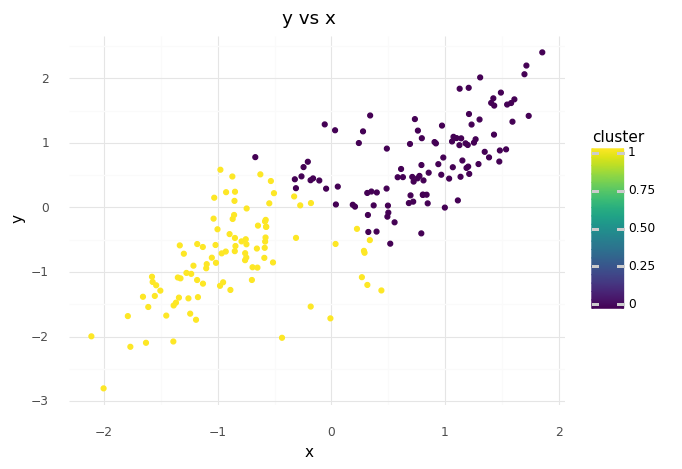

<ggplot: (341825762)>

In [16]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

# perform K-Means

features = ['x', 'y']
X = d1[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 2)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal() + ggtitle('y vs x'))

SILHOUETE:  0.45114087997192337


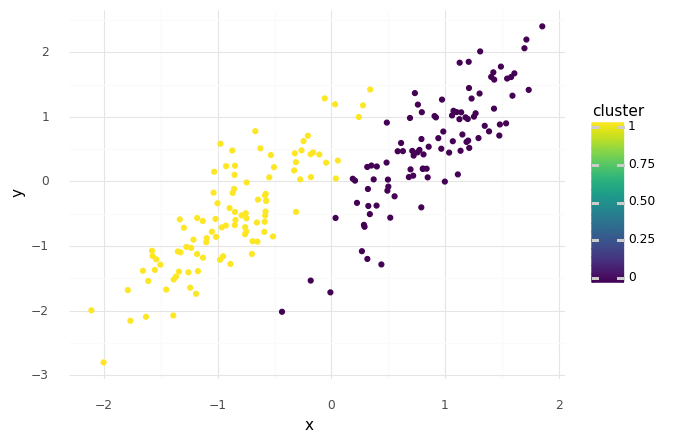

<ggplot: (341742382)>

In [15]:
# perform EM

X = d1[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=2)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster

(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal())


## 1.2 Spread Out Clusters

0.558315766313531


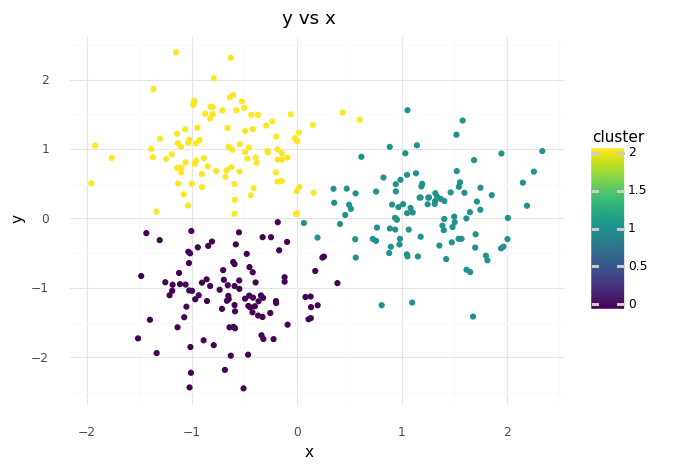

<ggplot: (341954298)>

In [20]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

# perform K-Means
features = ['x', 'y']
X = d2[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 3)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal() + ggtitle('y vs x'))

SILHOUETE:  0.5582207084607604


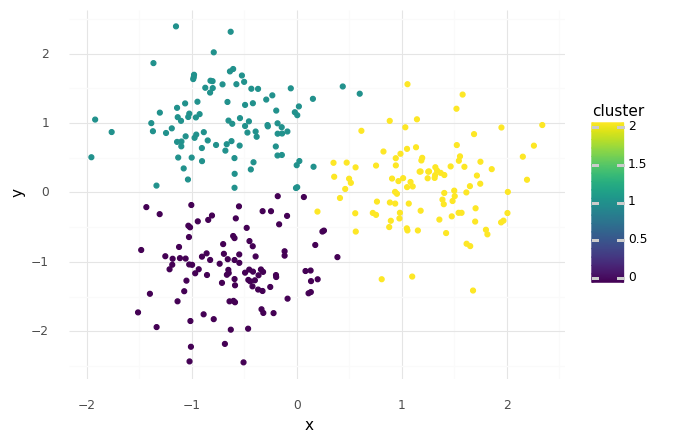

<ggplot: (341712674)>

In [21]:
# perform EM
X = d2[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 3)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster

(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal())

## 1.3 Very Distinct Clusters

0.913619050733588


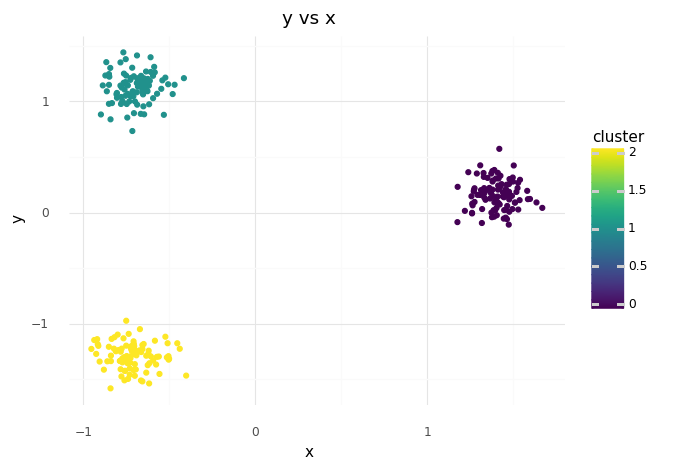

<ggplot: (342110151)>

In [24]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

# perform K-Means
features = ['x', 'y']
X = d3[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 3)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal() + ggtitle('y vs x'))


SILHOUETE:  0.913619050733588


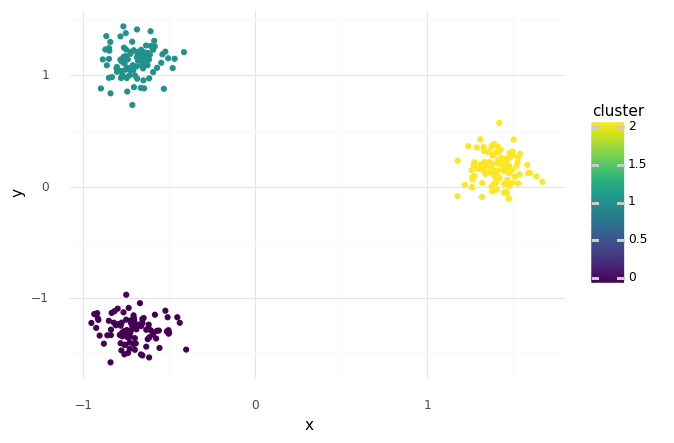

<ggplot: (342075371)>

In [23]:
# perform EM
X = d3[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=3)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster

(ggplot(X, aes(x = 'x', y = 'y', color = 'cluster')) + geom_point() + theme_minimal())

## 1.4 Cluster in Cluster

0.37428500782082524


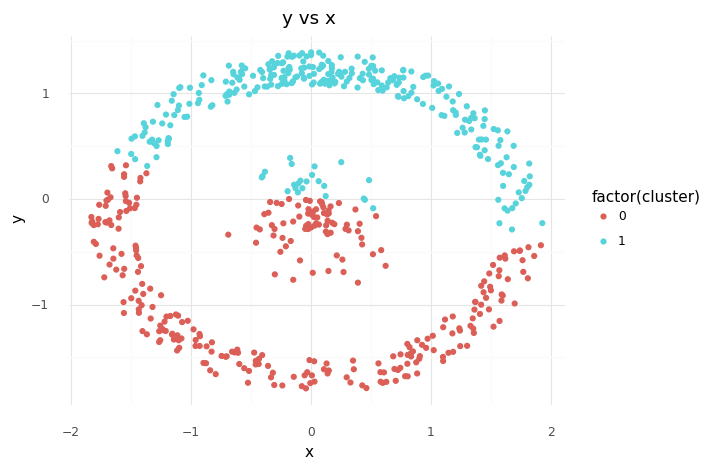

<ggplot: (339544845)>

In [43]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

# perform K-Means
features = ['x', 'y']
X = d4[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 2)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal() + ggtitle('y vs x'))


SILHOUETE:  0.2862051350533255


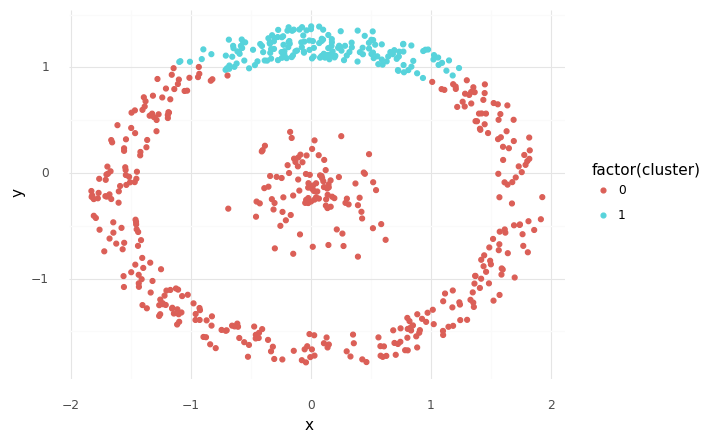

<ggplot: (344773825)>

In [46]:
# perform EM
X = d4[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 2)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal())

## 1.5 Uneven Cluster Sizes

0.7043537508086658


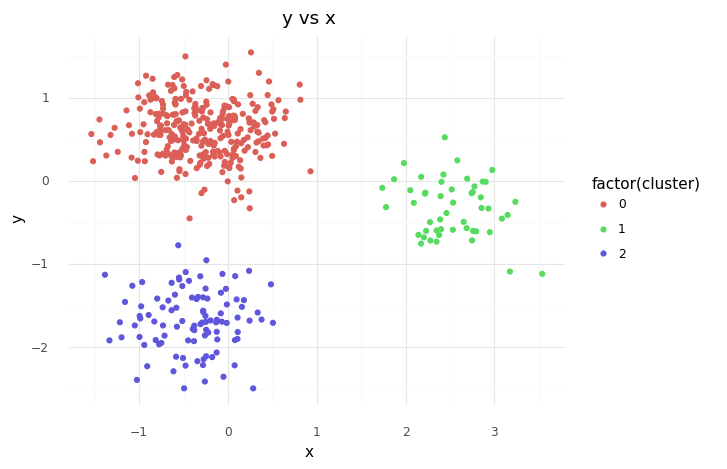

<ggplot: (344445127)>

In [34]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

# perform K-Means
features = ['x', 'y']
X = d5[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 3)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal() + ggtitle('y vs x'))

SILHOUETE:  0.7043537508086658


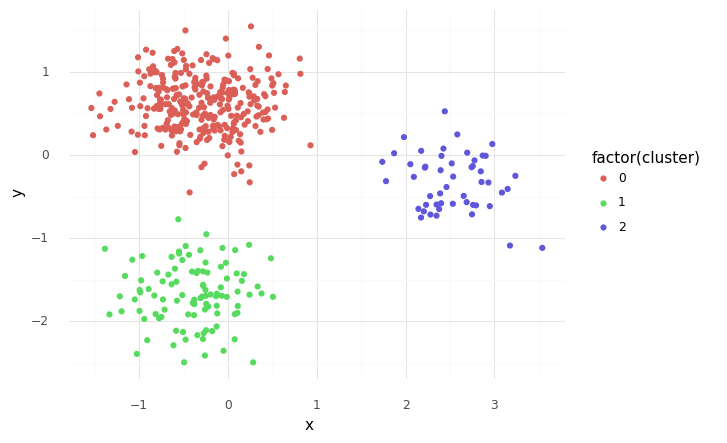

<ggplot: (344361626)>

In [36]:
# perform EM
X = d5[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=3)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal())


## 1.6 Clusters with Different Variance

0.5829742988895884


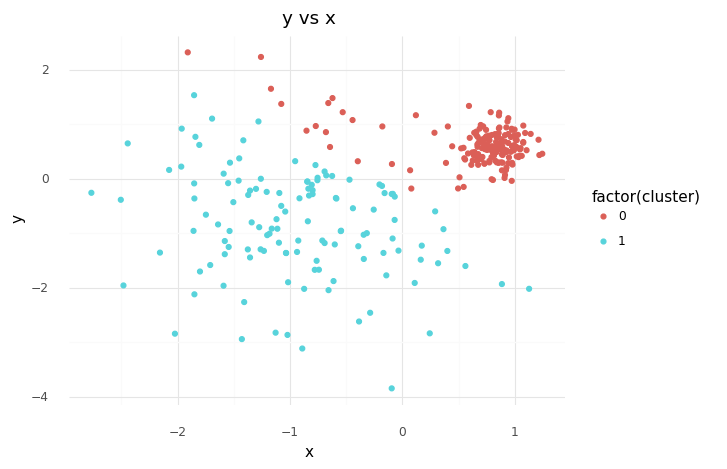

<ggplot: (344721149)>

In [41]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

# perform K-Means
features = ['x', 'y']
X = d6[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

km = KMeans(n_clusters = 2)
km.fit(X)

result = km.predict(X)
X['cluster'] = result
print(silhouette_score(X[features], result))


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal() + ggtitle('y vs x'))


SILHOUETE:  0.5531426830972709


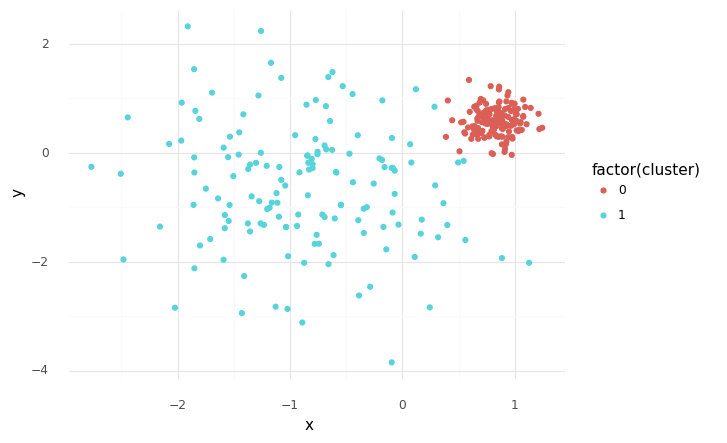

<ggplot: (344759546)>

In [42]:
# perform EM
X = d6[features]
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=2)
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETE: ", silhouette_score(X, cluster))
X['cluster'] = cluster


(ggplot(X, aes(x = 'x', y = 'y', color = 'factor(cluster)')) + geom_point() + theme_minimal())

## 1.7 Reflection

What cautions will you now take when doing K-Means? In other words, what issues did this classwork present that might change how you apply clustering to real data?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

# 2. Recovering TRUE Cluster Membership

Normally when performing clustering, we don't have "truth" labels that tell us which group each data point is in. But in this exercise we're going to perform clustering on (fake) data that *does* have truth labels and see whether K-Means or EM is better at recovering the true cluster membership (i.e. is better at clustering data points in the same cluster together). 

The images below show the TRUE cluster/group memberships used to generate the data in 1.1-1.6 above. Use these graphs to answer the following question:

### *Question*

- Are there any issues with the number of clusters chosen? Is this number often correct? 

- Do you notice that there are times when EM is better at recovering cluster membership?

- What kind of clusters/data do you think EM and KM would perform *equally* well on? When would EM likely do better?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### 1.1
<img src="https://drive.google.com/uc?export=view&id=1D9fqveUI0tiga6JrBZH8ilI_m8RwmFax" width = 500px />

### 1.2
<img src="https://drive.google.com/uc?export=view&id=1vs0zDmacrTKLONnocUvvZ2pv96qoDsoE" width = 500px />

### 1.3
<img src="https://drive.google.com/uc?export=view&id=1fYD1gLNyEZ9k6nMho9P5Jal1t8xw4tN0" width = 500px />

### 1.4
<img src="https://drive.google.com/uc?export=view&id=1BL1Nh08IA1xn0g4vkokoCysQp71hXxf9" width = 500px />

### 1.5
<img src="https://drive.google.com/uc?export=view&id=1XrPKzDgDK4dson0oMEVjRTHAqgagdmWf" width = 500px />

### 1.6
<img src="https://drive.google.com/uc?export=view&id=1vWEsJqBYoa4nl_eqWUmQbYzWhJrszk8F" width = 500px />


# 3. Cluster Stability

You may have already noticed this, but K-Means and EM will often give different solutions each time it runs. Run the following cells multiple times and notice how different (or not) the results are. What do you think could cause this instability?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [ ]:
KM = KMeans(n_clusters = 9)
KM.fit(d6)
pred = KM.predict(d6)
ggplot(d6, aes("x", "y", color = pred)) + geom_point() + theme_minimal() + theme(legend_position = "none")

In [ ]:
GM = GaussianMixture(n_components = 9)
GM.fit(d5)
pred = GM.predict(d5)
ggplot(d5, aes("x", "y", color = pred)) + geom_point() + theme_minimal() + theme(legend_position = "none")


# 4. Chelsea's Thoughts

I hope this classwork doesn't scare you away from clustering. Clustering is an incredibly useful tool! However, it's not a perfect tool, and like all the other models we've learned, you have to be careful and thoughtful in how you apply it. 

I love [this](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means/133694#133694) stackOverflow thread about k-means if you want to delve deeper.